# Pymaceuticals Inc.
---

### Analysis

- Analysis of Pymaceuticals Data

- Summary of Data

    248 mice, 51% male and 49% female were observed on 10 separate treatments although the conclusions were based on four drugs: Capomulin, Ramicane, Infubinol, Ceftamin. 

    Conclusions:
     - The four regimens chosen to observe in the conclusion of finding had the lowest standard error of the mean with SEM’s between 0.32 and 0.49 which means the data is more reliable for these treatment regimens. The SEM statistics for Capomulin and Ramicane were 0.329 and 0.321 respectively.
    - Capomulin and Ramicane had the smallest average final tumor volume in mm3 after a treatment regimen of 45 days.  
    - Pinpointing the results of a single mouse (l509) the graph of the results of treatment showed an overall decrease in tumor size, however the tumor showed significant growth over the first 20 days with somewhat significant decreased over shorter periods of time. The decrease in tumor size was not consistent and by the end of the study tumor growth began to increase significantly.

### References
#### Used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
#### https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html
#### Data generated by MockarooLinks to an external site., LLC (2022). Realistic Data Generator.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_data_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [71]:
# Checking the number of mice.
mice_count = len(combined_study_data_df["Mouse ID"].unique())
mice_count

249

In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = combined_study_data_df[combined_study_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
dup_id
# Used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

array(['g989'], dtype=object)

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = combined_study_data_df[combined_study_data_df["Mouse ID"]== "g989"]
dup_mouse_id
# Used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_df = combined_study_data_df[combined_study_data_df["Mouse ID"] != 'g989']

In [75]:
# Checking the number of mice in the clean DataFrame.
len(# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = clean_study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
study_summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                                   "Median Tumor Volume": median,
                                   "Variance of Tumor Volume": variance,
                                   "Standar Deviation of Tumor Volume": standard_dev,
                                   "SEM of Tumor Volume": sem})
study_summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standar Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
study_summary_table2 = clean_study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", 
                                                    "median", "var", "std", "sem"])
study_summary_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

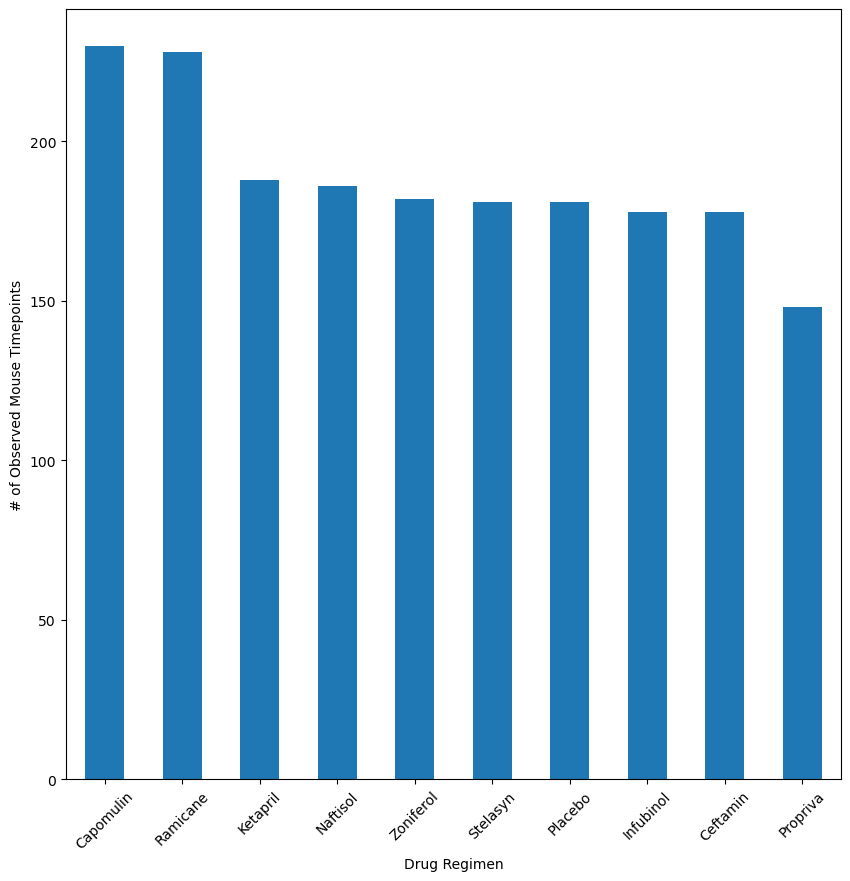

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug 
# regimen using Pandas.
mouse_count = clean_study_data_df["Drug Regimen"].value_counts()
mouse_count.plot(kind="bar", figsize=(10, 10))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45) # starter code has rotation = 90 45 looks better
plt.show()

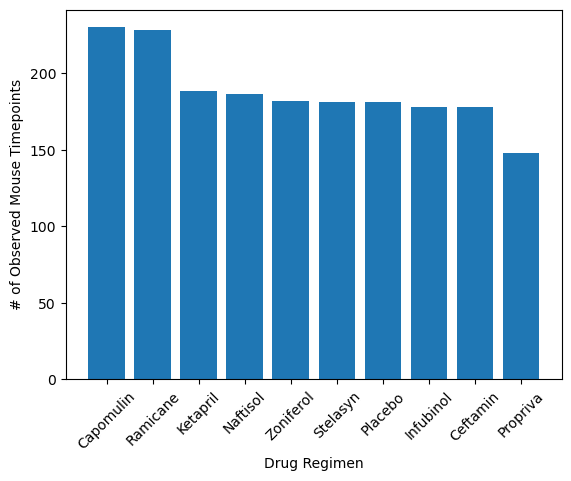

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each 
# drug regimen using pyplot.
mouse_count = clean_study_data_df["Drug Regimen"].value_counts()
drug_regimen = mouse_count.index.values
plt.bar(drug_regimen, mouse_count)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

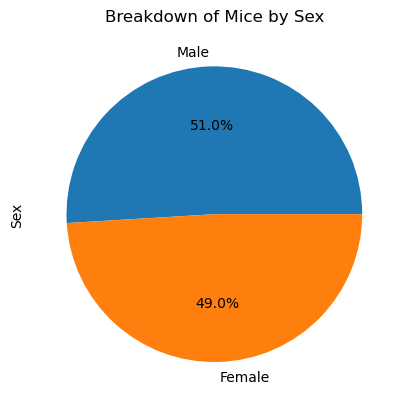

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_study_data_df["Sex"].value_counts()
mouse_sex.plot(kind = "pie", title = "Breakdown of Mice by Sex",
                   ylabel="Sex", autopct="%1.1f%%")

plt.show()

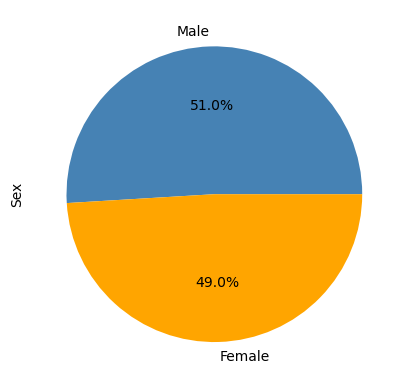

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = clean_study_data_df["Sex"].value_counts()
male = mouse_sex[0]
female = mouse_sex[1]
values = [male, female]
labels = ["Male", "Female"]
colors =["steelblue", "orange"]
# plot pie chart and format labels, colors and percentages 
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_study_data_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
complete_study_df = pd.merge(clean_study_data_df, greatest_timepoint_df, on=["Mouse ID", "Timepoint"])
complete_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
i = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_mice = complete_study_df.loc[complete_study_df["Drug Regimen"]== treatment,:]
    
    # add subset 
    tumor_volume.append(treatment_mice["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartile = tumor_volume[i].quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq-lowerq
    lower_b = lowerq - (1.5*IQR)
    upper_b = lowerq + (1.5*IQR)
    i = i+1
    print(f"{treatment}'s potential outliers: Below {lower_b}) Above {upper_b}")

Capomulin's potential outliers: Below 20.70456164999999) Above 44.05015203000001
Ramicane's potential outliers: Below 17.912664470000003) Above 45.20827463
Infubinol's potential outliers: Below 36.83290494999999) Above 71.26431043
Ceftamin's potential outliers: Below 25.355449580000002) Above 72.08870612


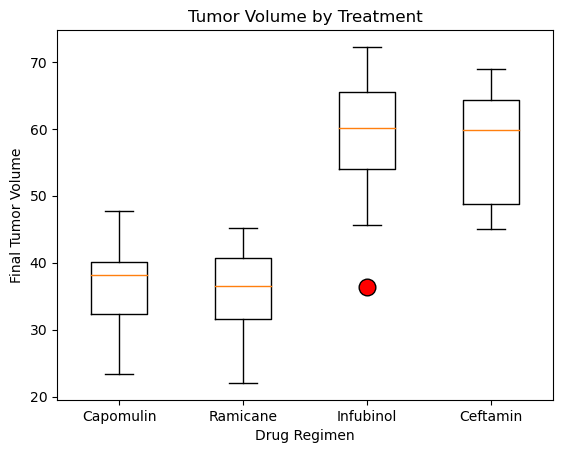

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels=treatments, flierprops=dict(markerfacecolor='red', 
                                                             marker='o', markersize=12), vert=True)
plt.title("Tumor Volume by Treatment")
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html

## Line and Scatter Plots

Text(0, 0.5, 'Tumore Volume (mm3)')

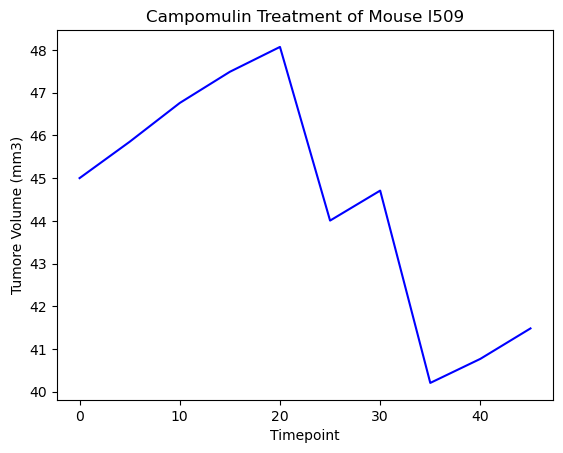

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_treatment = clean_study_data_df.loc[clean_study_data_df["Drug Regimen"]=="Capomulin"]
mouse_l509 = clean_study_data_df.loc[clean_study_data_df["Mouse ID"]=="l509"]
tumor_v = mouse_l509["Tumor Volume (mm3)"]
time_point = mouse_l509["Timepoint"]
plt.plot(time_point, tumor_v, color='blue')
plt.title("Campomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumore Volume (mm3)")

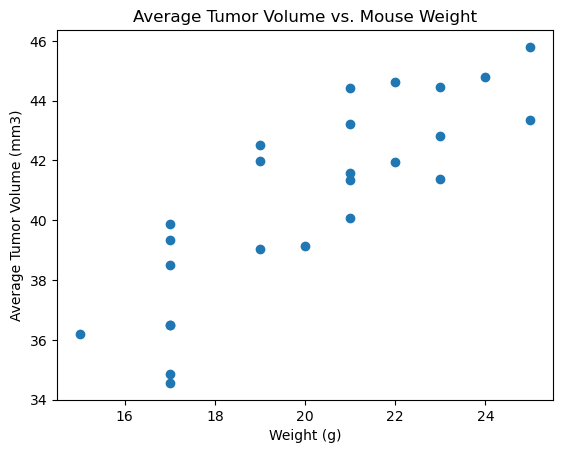

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for
# the entire Capomulin regimen

capomulin_reg = capo_treatment.groupby(["Mouse ID"])
avg_mouse_w = capomulin_reg["Weight (g)"].mean()
avg_tumor_v = capomulin_reg["Tumor Volume (mm3)"].mean()

plt.scatter(avg_mouse_w, avg_tumor_v)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


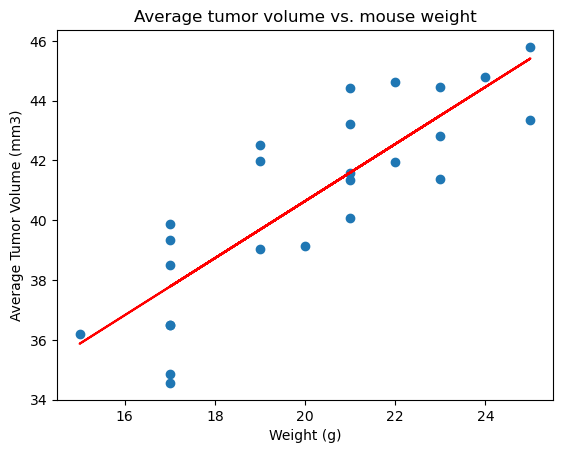

In [91]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_mouse_w = capomulin_reg["Weight (g)"].mean()
avg_tumor_v = capomulin_reg["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mouse_w, avg_tumor_v)
regress_values = avg_mouse_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_mouse_w, avg_tumor_v)
plt.plot(avg_mouse_w, regress_values, color="red")

correlation = st.pearsonr(avg_mouse_w, avg_tumor_v)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()